<a href="https://colab.research.google.com/github/pvpogorelova/metrics_24_25/blob/main/sem_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Семинар 26. Квантильная регрессия.**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

Рассмотрим набор данных индекса успеваемости начальной школы ($elemapi2.dta$). В датасете есть данные по следующим переменным:


* $api\_00$ --- индекс академической успеваемости;
* $acs\_k3$  --- средний размер класса от $K$ (Kindergarten, детский сад) до 3;
* $acs\_46$ --- средний размер класса от 4 до 6;
* $full$ --- процент полностью аттестованных учителей;
* $enroll$ --- количество учеников в школе.

 Постройте модель, которая прогнозирует оценки индекса академической успеваемости, используя модель множественной регрессии и модель квантильной регрессии.

In [ ]:
# загрузим данные
df = pd.read_stata("elemapi2.dta")
df

,snum,dnum,api00,api99,growth,meals,ell,yr_rnd,mobility,acs_k3,...,hsg,some_col,col_grad,grad_sch,avg_ed,full,emer,enroll,mealcat,collcat
0,906,41,693,600,93,67,9,No,11.0,16.0,...,0,0,0,0,NaN,76,24,247,47-80% free meals,1.0
1,889,41,570,501,69,92,21,No,33.0,15.0,...,0,0,0,0,NaN,79,19,463,81-100% free meals,1.0
2,887,41,546,472,74,97,29,No,36.0,17.0,...,0,0,0,0,NaN,68,29,395,81-100% free meals,1.0
3,876,41,571,487,84,90,27,No,27.0,20.0,...,45,9,9,0,1.91,87,11,418,81-100% free meals,1.0
4,888,41,478,425,53,89,30,No,44.0,18.0,...,50,0,0,0,1.50,87,13,520,81-100% free meals,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,482,796,745,736,9,27,12,No,11.0,18.0,...,29,23,37,7,3.12,95,5,266,0-46% free meals,2.0
396,489,796,720,678,42,34,8,No,20.0,19.0,...,34,26,26,6,2.88,85,7,461,0-46% free meals,3.0
397,504,796,802,787,15,26,10,No,21.0,19.0,...,27,21,37,12,3.29,91,5,360,0-46% free meals,2.0
398,488,796,539,424,115,98,12,No,18.0,20.0,...,75,13,1,0,2.06,93,7,301,81-100% free meals,1.0


In [ ]:
# Обычная линейная регрессия (OLS)
ols_model = smf.ols('api00 ~ acs_k3 + acs_46 + full + enroll', data=df).fit()
print(ols_model.summary())

# Протестируем гипотезу о том, что средние размеры классов одновременно незначимы
hypotheses = '(acs_k3 = 0), (acs_46 = 0)'
f_test = ols_model.f_test(hypotheses)
print(f"\nF-test for joint significance of acs_k3 and acs_46:\n{f_test}\n")

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     61.01
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           5.34e-40
Time:                        08:11:36   Log-Likelihood:                -2422.5
No. Observations:                 395   AIC:                             4855.
Df Residuals:                     390   BIC:                             4875.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2004     84.955     -0.061      0.9

In [ ]:
# Квантильная регрессия сразу для нескольких квантилей с бутстрапированными ошибками
np.random.seed(1001)
quantiles_mq = [0.1]
models_mq = [smf.quantreg('api00 ~ acs_k3 + acs_46 + full + enroll', data=df).fit(q=q, vcov='iid') for q in quantiles_mq]
# Вывод результатов для всех моделей
for q, model in zip(quantiles_mq, models_mq):
    print(f"\n=== Результаты квантильной регрессии для квантиля {q} ===\n")
    print(model.summary())
    print("\n" + "="*80 + "\n")


=== Результаты квантильной регрессии для квантиля 0.1 ===

                         QuantReg Regression Results                          
Dep. Variable:                  api00   Pseudo R-squared:               0.1768
Model:                       QuantReg   Bandwidth:                       80.91
Method:                 Least Squares   Sparsity:                        477.4
Date:                Fri, 18 Apr 2025   No. Observations:                  395
Time:                        08:43:47   Df Residuals:                      390
                                        Df Model:                            4
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    123.1730    108.434      1.136      0.257     -90.015     336.361
acs_k3         4.1477      5.579      0.743      0.458      -6.821      15.117
acs_46         3.8381      1.954      1.964      0.050      -0.004     

In [ ]:
from tqdm import tqdm
from scipy import stats

# Устанавливаем seed для воспроизводимости
np.random.seed(1001)

# Параметры анализа
quantiles_mq = [0.1, 0.5, 0.75, 0.9]
models_mq = []  # здесь будем хранить финальные модели с правильными SE
n_boot = 50
predictors = ['Intercept', 'acs_k3', 'acs_46', 'full', 'enroll']

# Бутстрэп-процедура
print("Запуск бутстрэп-процедуры...")
bootstrap_coefs = {q: [] for q in quantiles_mq}
for _ in tqdm(range(n_boot), desc="Прогресс"):
    bootstrap_sample = df.sample(n=len(df), replace=True)
    for q in quantiles_mq:
        model = smf.quantreg('api00 ~ acs_k3 + acs_46 + full + enroll',
                           data=bootstrap_sample).fit(q=q)
        bootstrap_coefs[q].append(model.params)

for q in quantiles_mq:
    # Основная модель
    main_model = smf.quantreg('api00 ~ acs_k3 + acs_46 + full + enroll', data=df).fit(q=q)

    # Рассчитываем бутстрап-стандартные ошибки
    coefs = pd.DataFrame(bootstrap_coefs[q])
    bse = coefs.std()

    # Создаем новую модель с бутстрап-SE
    main_model.bse = bse  # перезаписываем стандартные ошибки
    models_mq.append(main_model)

# Функция для создания красивой таблицы
def create_results_table(q):
    main_model = smf.quantreg('api00 ~ acs_k3 + acs_46 + full + enroll', data=df).fit(q=q)
    coefs_df = pd.DataFrame(bootstrap_coefs[q])
    bse = coefs_df.std()

    results = pd.DataFrame({
        'factor': predictors,
        'coeff': [main_model.params[p] for p in predictors],
        'std err (boot)': [bse[p] for p in predictors],
        '95% CI low': [main_model.params[p] - 1.96*bse[p] for p in predictors],
        '95% CI high': [main_model.params[p] + 1.96*bse[p] for p in predictors],
        't-stat': [main_model.params[p]/bse[p] for p in predictors],
        'p-value': [2*(1-stats.norm.cdf(abs(main_model.params[p]/bse[p]))) for p in predictors]
    })

    # Форматирование чисел
    for col in results.columns[1:]:
        results[col] = results[col].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)

    return results

# Вывод результатов для каждого квантиля
for q in quantiles_mq:
    print(f"\n{'='*80}")
    print(f"=== Результаты квантильной регрессии для квантиля {q} (бутстрэп, n={n_boot}) ===")
    print(f"{'='*80}\n")

    results_table = create_results_table(q)
    display(results_table)

Запуск бутстрэп-процедуры...


Прогресс:   6%|▌         | 3/50 [00:00<00:12,  3.76it/s]/usr/local/lib/python3.11/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
Прогресс:  10%|█         | 5/50 [00:01<00:13,  3.36it/s]/usr/local/lib/python3.11/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
Прогресс:  14%|█▍        | 7/50 [00:02<00:12,  3.56it/s]/usr/local/lib/python3.11/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
Прогресс:  34%|███▍      | 17/50 [00:04<00:05,  5.63it/s]/usr/local/lib/python3.11/dist-packages/statsmodels/regression/quantile_regression.py:191: Iterat


=== Результаты квантильной регрессии для квантиля 0.1 (бутстрэп, n=50) ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,Intercept,123.1730,157.9326,-186.3750,432.7209,0.7799,0.4354
1,acs_k3,4.1477,6.5691,-8.7278,17.0231,0.6314,0.5278
2,acs_46,3.8381,1.4933,0.9113,6.7649,2.5703,0.0102
3,full,2.7921,0.5009,1.8104,3.7737,5.5746,0.0000
4,enroll,-0.1109,0.0356,-0.1807,-0.0411,-3.1154,0.0018



=== Результаты квантильной регрессии для квантиля 0.5 (бутстрэп, n=50) ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,Intercept,17.1505,122.3975,-222.7486,257.0496,0.1401,0.8886
1,acs_k3,1.2691,7.2639,-12.9683,15.5064,0.1747,0.8613
2,acs_46,7.2241,2.1501,3.0098,11.4383,3.3598,0.0008
3,full,5.3238,0.5340,4.2772,6.3705,9.9699,0.0000
4,enroll,-0.1246,0.0376,-0.1982,-0.0509,-3.3155,0.0009



=== Результаты квантильной регрессии для квантиля 0.75 (бутстрэп, n=50) ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,Intercept,-102.3470,92.5227,-283.6914,78.9975,-1.1062,0.2686
1,acs_k3,11.4332,5.1654,1.3090,21.5574,2.2134,0.0269
2,acs_46,7.6964,2.8283,2.1528,13.2399,2.7212,0.0065
3,full,5.1955,0.6531,3.9154,6.4757,7.9548,0.0000
4,enroll,-0.1115,0.0492,-0.2079,-0.0151,-2.2670,0.0234



=== Результаты квантильной регрессии для квантиля 0.9 (бутстрэп, n=50) ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,Intercept,27.0001,126.3078,-220.5633,274.5635,0.2138,0.8307
1,acs_k3,18.3579,5.2416,8.0844,28.6314,3.5024,0.0005
2,acs_46,3.2718,2.6432,-1.9089,8.4525,1.2378,0.2158
3,full,4.4980,0.4335,3.6485,5.3476,10.3772,0.0000
4,enroll,-0.1203,0.0487,-0.2157,-0.0249,-2.4723,0.0134


In [ ]:
# Тест на равенство коэффициентов в моделях разных квантилей
# H0: [q10]enroll = [q90]enroll
from scipy import stats

# Получаем коэффициенты и их стандартные ошибки для enroll
coef_01 = models_mq[0].params['enroll']  # для q=0.1
coef_09 = models_mq[2].params['enroll']  # для q=0.9

se_01 = pd.DataFrame(bootstrap_coefs[0.1]).std()['enroll']  # стандартная ошибка для q=0.1
se_09 = pd.DataFrame(bootstrap_coefs[0.9]).std()['enroll']  # стандартная ошибка для q=0.9

# Вычисляем разность коэффициентов и её стандартную ошибку
diff = coef_01 - coef_09
se_diff = np.sqrt(se_01**2 + se_09**2)  # стандартная ошибка разности

# Вычисляем статистику Вальда
wald_stat = diff / se_diff
p_value = 2 * (1 - stats.norm.cdf(abs(wald_stat)))  # двусторонний тест

# Выводим результаты теста
print("\nТест равенства коэффициентов при enroll для квантилей 0.1 и 0.9:")
print(f"Коэффициент для q=0.1: {coef_01:.4f} (std err: {se_01:.4f})")
print(f"Коэффициент для q=0.9: {coef_09:.4f} (std err: {se_09:.4f})")
print(f"Разность коэффициентов: {diff:.4f} (std err: {se_diff:.4f})")
print(f"Wald statistic: {wald_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print(f"\nЗаключение: Отвергаем нулевую гипотезу (p={p_value:.4f} < {alpha}). Коэффициенты статистически значимо различаются.")
else:
    print(f"\nЗаключение: Не отвергаем нулевую гипотезу (p={p_value:.4f} >= {alpha}). Нет доказательств различия коэффициентов.")


Тест равенства коэффициентов при enroll для квантилей 0.1 и 0.9:
Коэффициент для q=0.1: -0.1109 (std err: 0.0356)
Коэффициент для q=0.9: -0.1115 (std err: 0.0487)
Разность коэффициентов: 0.0006 (std err: 0.0603)
Wald statistic: 0.0104
P-value: 0.9917

Заключение: Не отвергаем нулевую гипотезу (p=0.9917 >= 0.05). Нет доказательств различия коэффициентов.


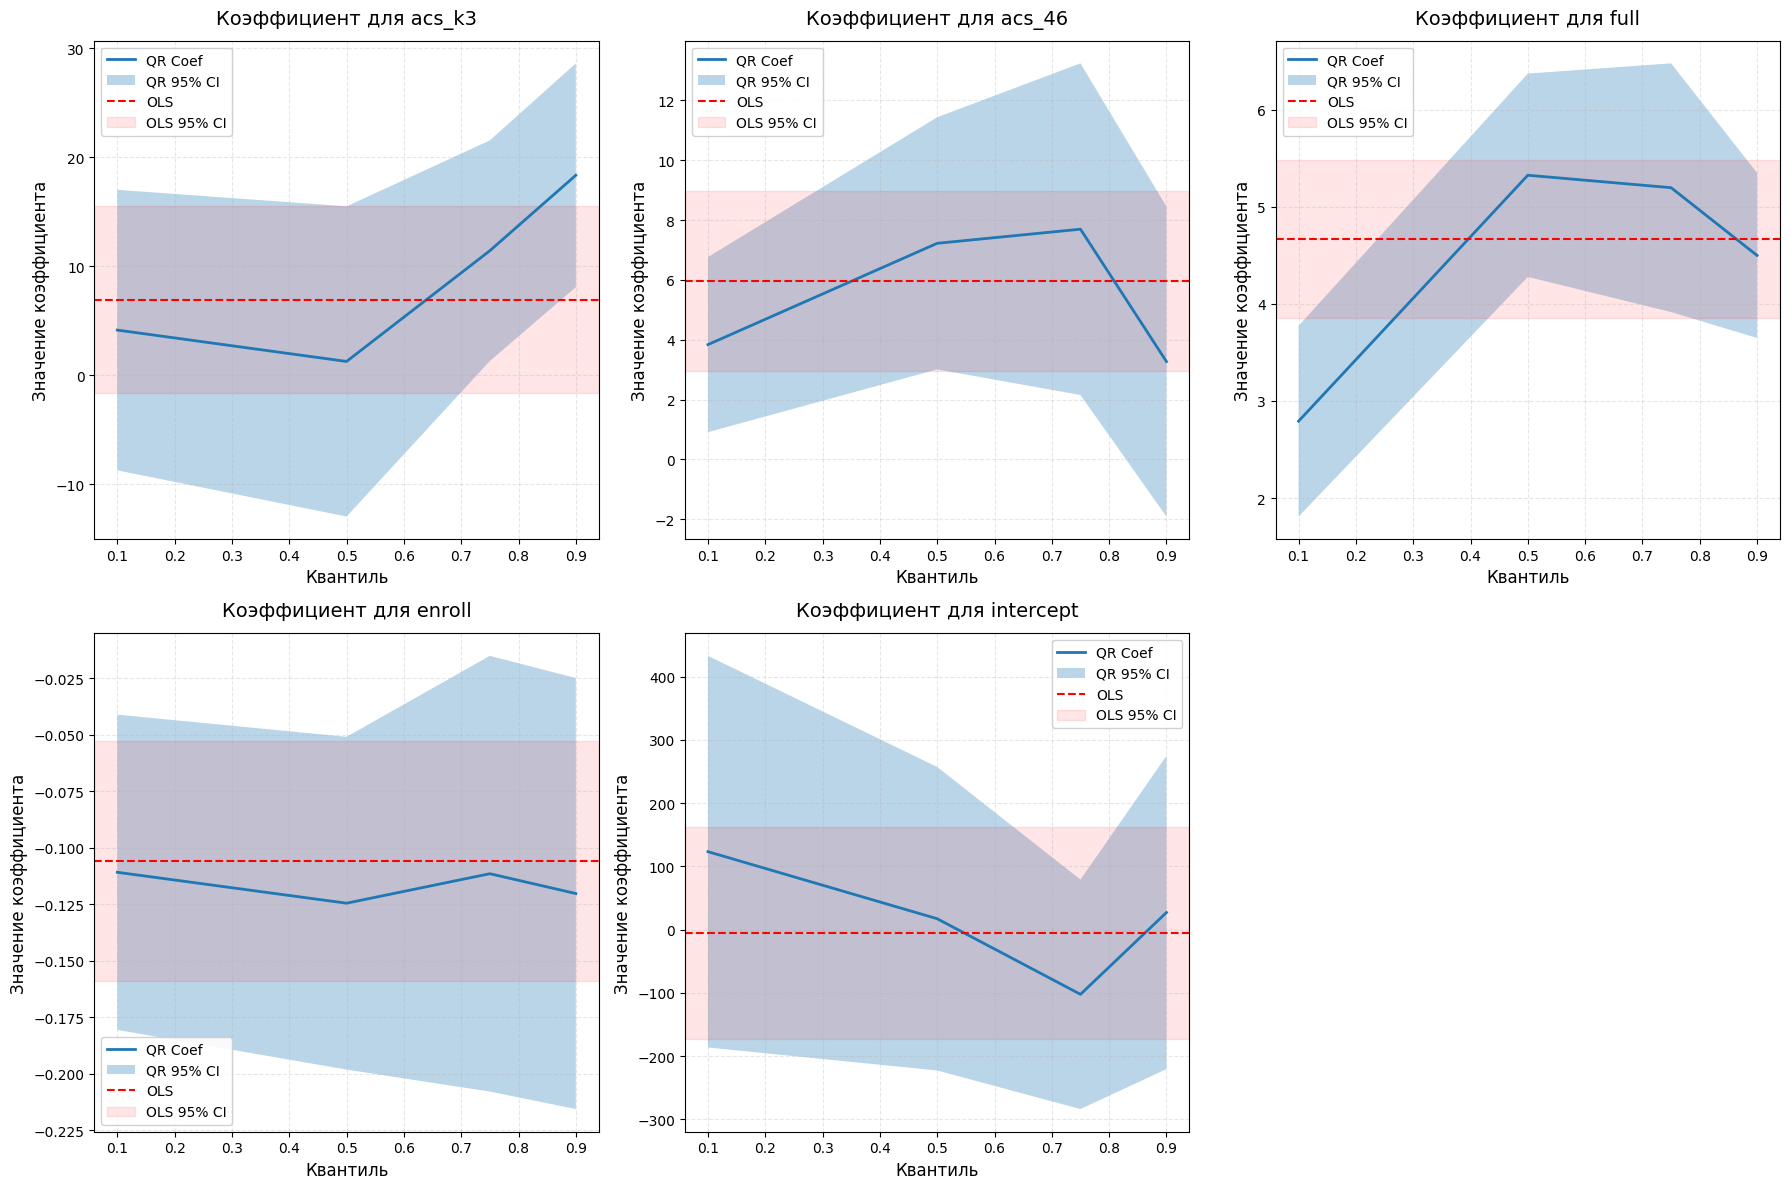

In [ ]:
# Квантильная регрессия по квантилям
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем DataFrame для графиков из результатов бутстрэпа
plot_data = pd.DataFrame()
for q in quantiles_mq:
    model = models_mq[quantiles_mq.index(q)]
    coefs = pd.DataFrame({
        'quantile': q,
        # Коэффициенты
        'acs_k3': model.params['acs_k3'],
        'acs_46': model.params['acs_46'],
        'full': model.params['full'],
        'enroll': model.params['enroll'],
        'intercept': model.params['Intercept'],
        # Доверительные интервалы
        'acs_k3_lower': model.params['acs_k3'] - 1.96 * model.bse['acs_k3'],
        'acs_k3_upper': model.params['acs_k3'] + 1.96 * model.bse['acs_k3'],
        'acs_46_lower': model.params['acs_46'] - 1.96 * model.bse['acs_46'],
        'acs_46_upper': model.params['acs_46'] + 1.96 * model.bse['acs_46'],
        'full_lower': model.params['full'] - 1.96 * model.bse['full'],
        'full_upper': model.params['full'] + 1.96 * model.bse['full'],
        'enroll_lower': model.params['enroll'] - 1.96 * model.bse['enroll'],
        'enroll_upper': model.params['enroll'] + 1.96 * model.bse['enroll'],
        'intercept_lower': model.params['Intercept'] - 1.96 * model.bse['Intercept'],
        'intercept_upper': model.params['Intercept'] + 1.96 * model.bse['Intercept']
    }, index=[0])
    plot_data = pd.concat([plot_data, coefs], ignore_index=True)

# Графики для каждого предиктора
predictors = ['acs_k3', 'acs_46', 'full', 'enroll', 'intercept']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, pred in enumerate(predictors):
    ax = axes[i]
    ols_pred_name = pred if pred != 'intercept' else 'Intercept'

    # Квантильная регрессия
    sns.lineplot(data=plot_data, x='quantile', y=pred, ax=ax,
                label='QR Coef', linewidth=2)
    ax.fill_between(plot_data['quantile'],
                   plot_data[f'{pred}_lower'],
                   plot_data[f'{pred}_upper'],
                   alpha=0.3, label='QR 95% CI')

    # OLS для сравнения
    ax.axhline(ols_model.params[ols_pred_name],
              color='red', linestyle='--',
              linewidth=1.5, label='OLS')
    ax.axhspan(ols_conf_int.loc[ols_pred_name, 0],
              ols_conf_int.loc[ols_pred_name, 1],
              color='red', alpha=0.1, label='OLS 95% CI')

    # Настройки графика
    ax.set_title(f'Коэффициент для {pred}', fontsize=14, pad=12)
    ax.set_xlabel('Квантиль', fontsize=12)
    ax.set_ylabel('Значение коэффициента', fontsize=12)
    ax.legend(fontsize=10, framealpha=0.9)
    ax.grid(True, linestyle='--', alpha=0.3)

# Удаляем лишние оси
for j in range(len(predictors), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()